In [3]:
import tensorflow.keras as keras

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
first_net = keras.models.Sequential()

NameError: name 'keras' is not defined

In [4]:
first_net.add(keras.layers.Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
first_net.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
first_net.add(keras.layers.Flatten())
first_net.add(keras.layers.Dense(units = 128, activation = 'relu'))
first_net.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [5]:
first_net.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [6]:
first_net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30752)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3936384   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('./dataset/training_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')
test_set = test_datagen.flow_from_directory('./dataset/test_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [10]:
first_net.fit_generator(training_set,
steps_per_epoch = 1000,
epochs = 5,
validation_data = test_set,
validation_steps = 2000)

Epoch 1/10
5000/5000 [==============================] - 1236s 247ms/step - loss: 0.4267 - accuracy: 0.7987 - val_loss: 0.5782 - val_accuracy: 0.7743
Epoch 2/10
5000/5000 [==============================] - 1331s 266ms/step - loss: 0.3059 - accuracy: 0.8667 - val_loss: 0.7333 - val_accuracy: 0.7570
Epoch 3/10
5000/5000 [==============================] - 1895s 379ms/step - loss: 0.2140 - accuracy: 0.9118 - val_loss: 0.9878 - val_accuracy: 0.7330
Epoch 4/10
5000/5000 [==============================] - 1884s 377ms/step - loss: 0.1555 - accuracy: 0.9385 - val_loss: 1.0755 - val_accuracy: 0.7555
Epoch 5/10
5000/5000 [==============================] - 1625s 325ms/step - loss: 0.1180 - accuracy: 0.9548 - val_loss: 1.1965 - val_accuracy: 0.7584
Epoch 6/10
1789/5000 [=========>....................] - ETA: 11:09 - loss: 0.1003 - accuracy: 0.9623

KeyboardInterrupt: 

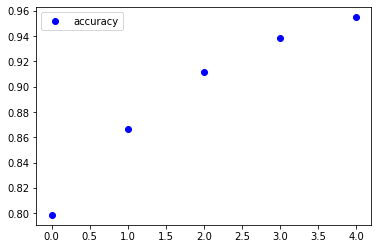

In [15]:
# plotting accuracy and validation accuracy
import matplotlib.pyplot as plt

accuracy = first_net.history.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'bo', label = 'accuracy')
plt.legend()

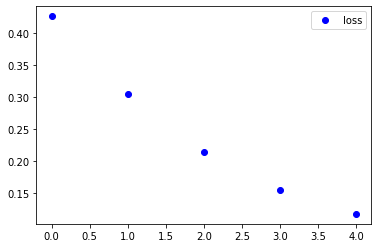

In [16]:
loss = first_net.history.history['loss']
plt.plot(range(len(loss)), loss, 'bo', label = 'loss')
plt.legend()

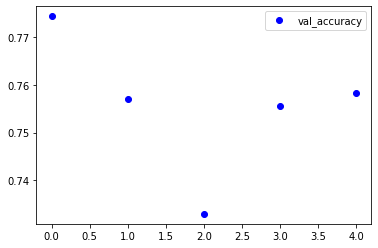

In [17]:
val_accuracy = first_net.history.history['val_accuracy']
plt.plot(range(len(val_accuracy)), val_accuracy, 'bo', label = 'val_accuracy')
plt.legend()

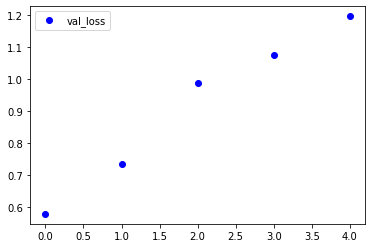

In [18]:
val_loss = first_net.history.history['val_loss']
plt.plot(range(len(val_loss)), val_loss, 'bo', label = 'val_loss')
plt.legend()

In [19]:
#save model
first_net.save("first_net.h5")

In [60]:
#testing model
import numpy as np
from keras.preprocessing import image

def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = first_net.predict(x = test_image)
    print(result)
    #training_set.class_indices
    
    if result[0][0] == 1:
        prediction = 'dog'
    else:
        prediction = 'cat'
    return prediction

In [63]:
print(testing_image('./dataset/test_set/cats/cat.4015.jpg'))
#что-то пошло не так, это видно и по графикам для валидационной выборке

[[1. 0.]]
dog


In [42]:
IMAGE_WIDTH=64
IMAGE_HEIGHT=64
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
FAST_RUN = False

In [36]:
second_net = Sequential()
second_net.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
second_net.add(MaxPooling2D(pool_size=(2, 2)))
second_net.add(Dropout(0.25))

second_net.add(Conv2D(64, (3, 3), activation='relu'))
second_net.add(MaxPooling2D(pool_size=(2, 2)))
second_net.add(Dropout(0.25))

second_net.add(Conv2D(128, (3, 3), activation='relu'))
second_net.add(MaxPooling2D(pool_size=(2, 2)))
second_net.add(Dropout(0.25))

second_net.add(Flatten())
second_net.add(Dense(512, activation='relu'))
second_net.add(Dropout(0.5))
second_net.add(Dense(2, activation='softmax'))

second_net.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

second_net.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 128)      

In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [44]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('./dataset/training_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('./dataset/test_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'categorical')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [47]:
total_validate = 8000
total_train = 2000
batch_size = 10

epochs = 3 if FAST_RUN else 30
history = second_net.fit_generator(
    training_set, 
    epochs = epochs,
    validation_data = test_set,
    validation_steps = total_validate // batch_size,
    steps_per_epoch = total_train // batch_size,
    callbacks = callbacks
)

Epoch 1/30
200/200 [==============================] - 291s 1s/step - loss: 0.6712 - accuracy: 0.5961 - val_loss: 0.6085 - val_accuracy: 0.6841
Epoch 2/30
200/200 [==============================] - 291s 1s/step - loss: 0.6350 - accuracy: 0.6439 - val_loss: 0.6247 - val_accuracy: 0.6641
Epoch 3/30
200/200 [==============================] - 290s 1s/step - loss: 0.5984 - accuracy: 0.6822 - val_loss: 0.5471 - val_accuracy: 0.7273
Epoch 4/30
200/200 [==============================] - 292s 1s/step - loss: 0.5962 - accuracy: 0.6814 - val_loss: 0.5284 - val_accuracy: 0.7448
Epoch 5/30
200/200 [==============================] - 300s 1s/step - loss: 0.5775 - accuracy: 0.6995 - val_loss: 0.5050 - val_accuracy: 0.7549
Epoch 6/30
200/200 [==============================] - 303s 2s/step - loss: 0.5734 - accuracy: 0.7088 - val_loss: 0.5072 - val_accuracy: 0.7653
Epoch 7/30
200/200 [==============================] - 292s 1s/step - loss: 0.5532 - accuracy: 0.7145 - val_loss: 0.6122 - val_accuracy: 0.6717

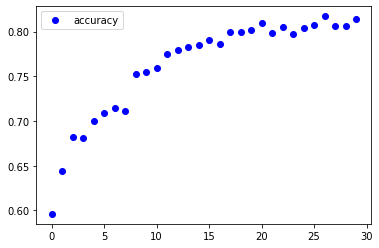

In [49]:
accuracy = history.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'bo', label = 'accuracy')
plt.legend()

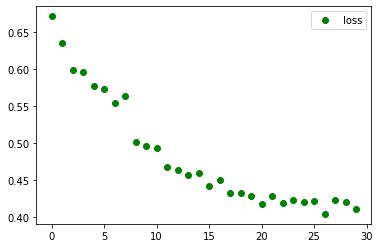

In [51]:
loss = history.history['loss']
plt.plot(range(len(loss)), loss, 'bo', label = 'loss', color = 'green')
plt.legend()

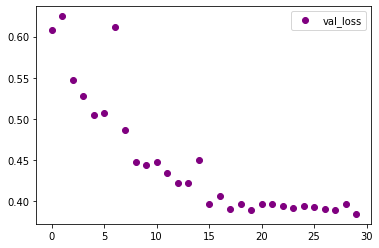

In [52]:
val_loss = history.history['val_loss']
plt.plot(range(len(val_loss)), val_loss, 'bo', label = 'val_loss', color = 'purple')
plt.legend()

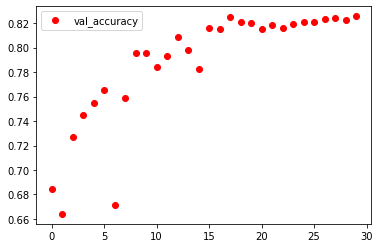

In [53]:
val_accuracy = history.history['val_accuracy']
plt.plot(range(len(val_accuracy)), val_accuracy, 'bo', label = 'val_accuracy', color = 'red')
plt.legend()

In [54]:
second_net.save("second_net.h5")

In [62]:
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = second_net.predict(x = test_image)
    print(result)
    #training_set.class_indices
    
    if result[0][0] == 1:
        prediction = 'dog'
    else:
        prediction = 'cat'
    return prediction

In [65]:
print(testing_image('./dataset/test_set/cats/cat.4010.jpg'))

[[0. 1.]]
cat


In [6]:
first_model = keras.models.load_model("./first_net.h5")
second_model = keras.models.load_model("./second_net.h5")

In [7]:
#нейронки полностью слишком много весят, поэтому сохраним только веса
first_model.save_weights('first_net_weights.h5')
second_model.save_weights('second_net_weights.h5')